# *Import Model section

In [1]:
%load_ext autoreload
%autoreload 2
# import packages
import pandas as pd
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from data_manipulate_module import load_prepare_data, fill_missing_data, add_time_s, add_time_s_equip_data
from useful_feature_module import sweep_get_std, sweep_get_diff, sweep_get_mean, compute_useful_feature
from waveform_characterizing_module import characterize_pulse

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# *Define utility function

In [2]:
def figure_layout(case_id = 1, font = 'times new roman', weight = 'regular', size = 12):
    # author - D.Q. Huang 201711
    # this function let you define how you want you figure displayed in Ipython Notebook
    # and figure font size, font weight and font style
    # cse_id can only be 1,2,3
    # 1: inline
    # 2: pdf
    # 3: intractive
    if len([case_id]) > 1:
        print('Error: one case one time')
        return -1
    if (case_id == np.array([1,2,3])).sum() == 0:
        print('Error: Case can only be 1,2,or,3')
        return -1
    if case_id == 1:
        %matplotlib notebook
        %matplotlib inline
    elif case_id == 2:
        %matplotlib inline
        from IPython.display import set_matplotlib_formats
        set_matplotlib_formats('pdf')
    elif case_id == 3:
        %matplotlib notebook
    font = {'family' : font,
            'weight' : weight,
            'size'   : size}
    matplotlib.rc('font', **font)

# *Highly centralized parameter space

In [3]:
# highly centralized parameter space
load_data = 0
prepare_data = 0

In [4]:
# read Excel data
# instrument
if not load_data:
    yd = []
    for i in range(1,12):
        path = '/Users/dongqinghuang/Github/NILM/A题部分数据/附件1/YD'+str(i)+'.xlsx'
        yd.append(pd.ExcelFile(path))
    
    equip_data = []
    operation_data = []
    for i in range(1,12):
        equip_data.append(yd[(i-1)].parse('设备数据'))
        operation_data.append(yd[(i-1)].parse('操作记录'))
    
    instrument = []
    for i in range(1,12):
        instrument.append('YD' + str((i)))

In [5]:
if not prepare_data:
    for i in range(0, len(equip_data)):
        equip_data[i] = fill_missing_data(equip_data[i])
        [equip_data[i],operation_data[i]] = add_time_s(equip_data[i], operation_data[i])

# *Calculate extra Features Sections

In [6]:
# compute diff - upto
for ii in range(0,len(equip_data)):
    for i in [1,2,3,4,5,6,7,8,9,10]: #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
        lable1 = 'PC_'+str(i)+'pDiff'
        lable2 = 'QC_'+str(i)+'pDiff'
        equip_data[ii][lable1] = sweep_get_diff(equip_data[ii]['PC'].values,i)
        equip_data[ii][lable2] = sweep_get_diff(equip_data[ii]['QC'].values,i)
    # compute mean
    '''
    for i in [2,3,4]:
        lable1 = 'PC_'+str(i)+'pMean'
        lable2 = 'QC_'+str(i)+'pMean'
        equip_data[ii][lable1] = sweep_get_mean(equip_data[ii]['PC'].values,i)
        equip_data[ii][lable2] = sweep_get_mean(equip_data[ii]['QC'].values,i)
    # compute std
    for i in [3,4,5]:
        lable1 = 'PC_'+str(i)+'pStd'
        lable2 = 'QC_'+str(i)+'pStd'
        equip_data[ii][lable1] = sweep_get_std(equip_data[ii]['PC'].values,i)
        equip_data[ii][lable2] = sweep_get_std(equip_data[ii]['QC'].values,i)
    '''

# *Quick look into data

<IPython.core.display.Javascript object>


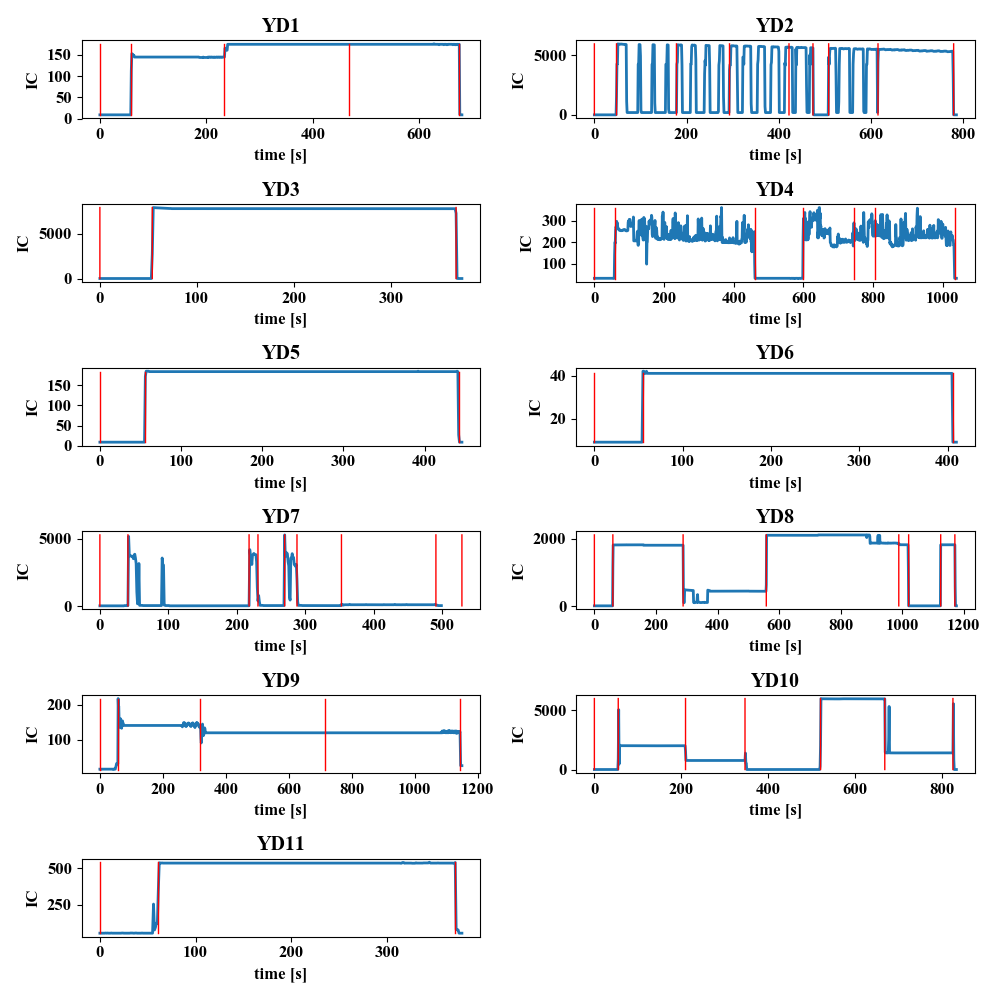

In [20]:
figure_layout(3)
fig = plt.figure(figsize=(10,10))
for i in range(0,len(equip_data)):
    #plt.subplot((431+i))
    ax = fig.add_subplot(6,2,(i+1))
    plt.plot(equip_data[i]['time_sec'], equip_data[i]['IC'].values, linewidth = 2)
    yy = np.arange(equip_data[i]['IC'].values.min(),equip_data[i]['IC'].values.max(),1)
    for ii in range(0, len(operation_data[i]['time_sec'])):
        plt.plot(operation_data[i]['time_sec'][ii]*np.ones(len(yy)), yy, linewidth = 1,color='red')
    # plt.plot(equip_data_2['PC'].values, linewidth = 3)
    plt.xlabel('time [s]')
    plt.ylabel('IC')
    plt.title(instrument[i])
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


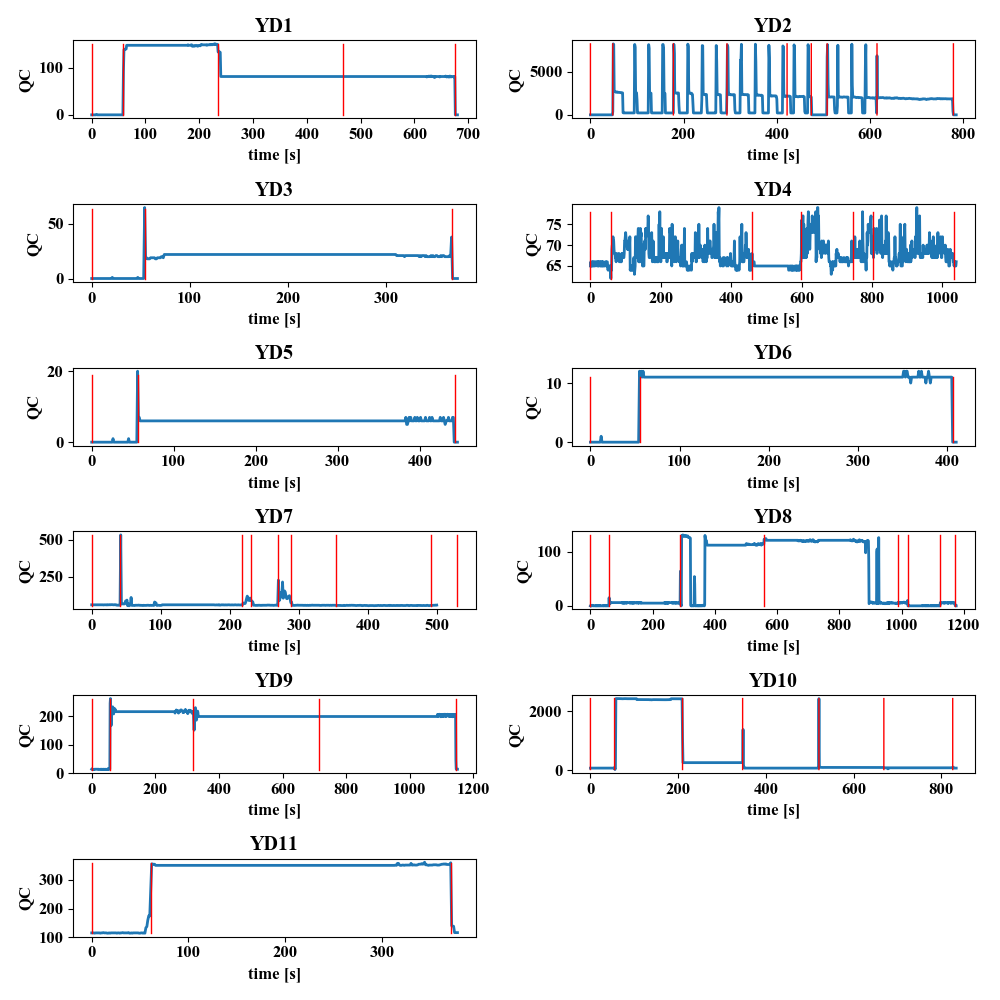

In [24]:
figure_layout(3)
fig = plt.figure(figsize=(10,10))
for i in range(0,len(equip_data)):
    #plt.subplot((431+i))
    ax = fig.add_subplot(6,2,(i+1))
    plt.plot(equip_data[i]['time_sec'], equip_data[i]['QC'].values, linewidth = 2)
    yy = np.arange(equip_data[i]['QC'].values.min(),equip_data[i]['QC'].values.max(),1)
    for ii in range(0, len(operation_data[i]['time_sec'])):
        plt.plot(operation_data[i]['time_sec'][ii]*np.ones(len(yy)), yy, linewidth = 1,color='red')
    # plt.plot(equip_data_2['PC'].values, linewidth = 3)
    plt.xlabel('time [s]')
    plt.ylabel('QC')
    plt.title(instrument[i])
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


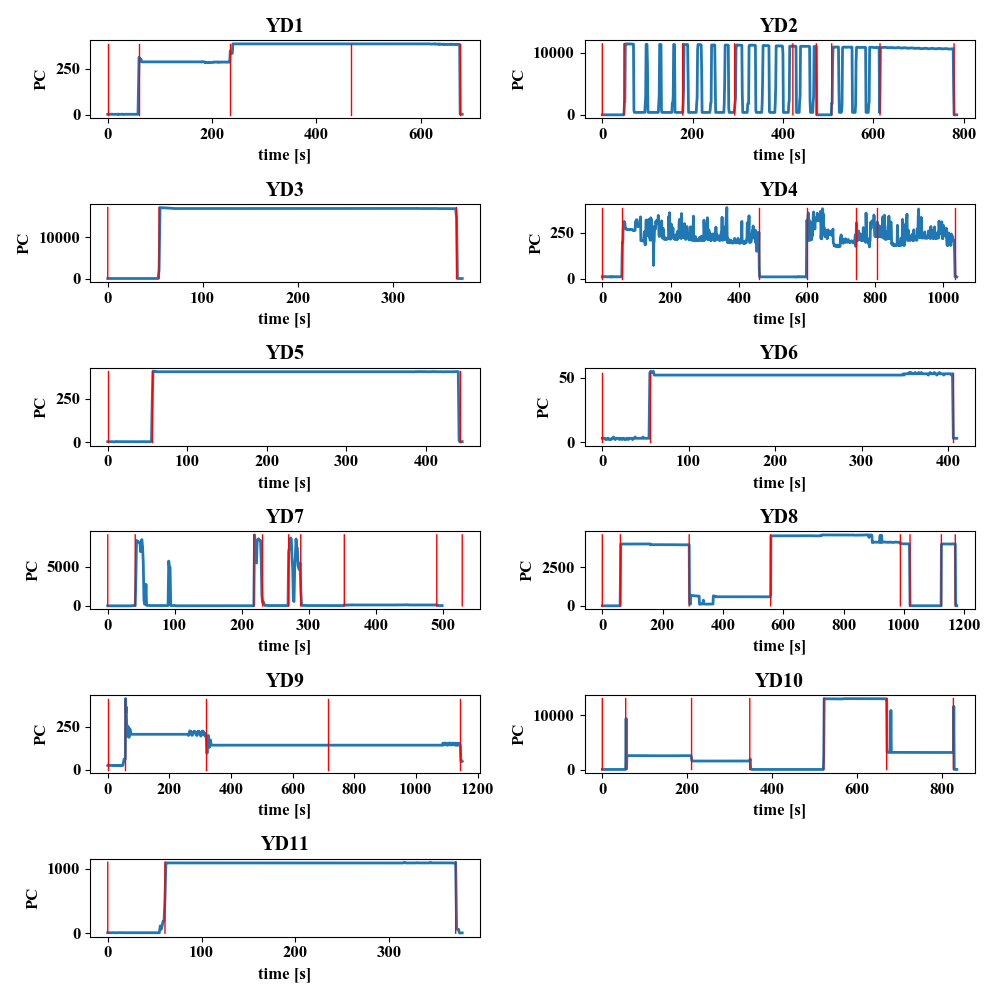

In [25]:
figure_layout(3)
fig = plt.figure(figsize=(10,10))
for i in range(0,len(equip_data)):
    #plt.subplot((431+i))
    ax = fig.add_subplot(6,2,(i+1))
    plt.plot(equip_data[i]['time_sec'], equip_data[i]['PC'].values, linewidth = 2)
    # plt.plot(equip_data_2['PC'].values, linewidth = 3)
    yy = np.arange(0,equip_data[i]['PC'].values.max(),1)
    for ii in range(0, len(operation_data[i]['time_sec'])):
        plt.plot(operation_data[i]['time_sec'][ii]*np.ones(len(yy)), yy, linewidth = 1,color='red')
    plt.xlabel('time [s]')
    plt.ylabel('PC')
    #plt.ylim(0.9,50000)
    #plt.yscale('log')
    plt.title(instrument[i])
plt.tight_layout()
plt.show()

# *Check diff of all equipment

<IPython.core.display.Javascript object>


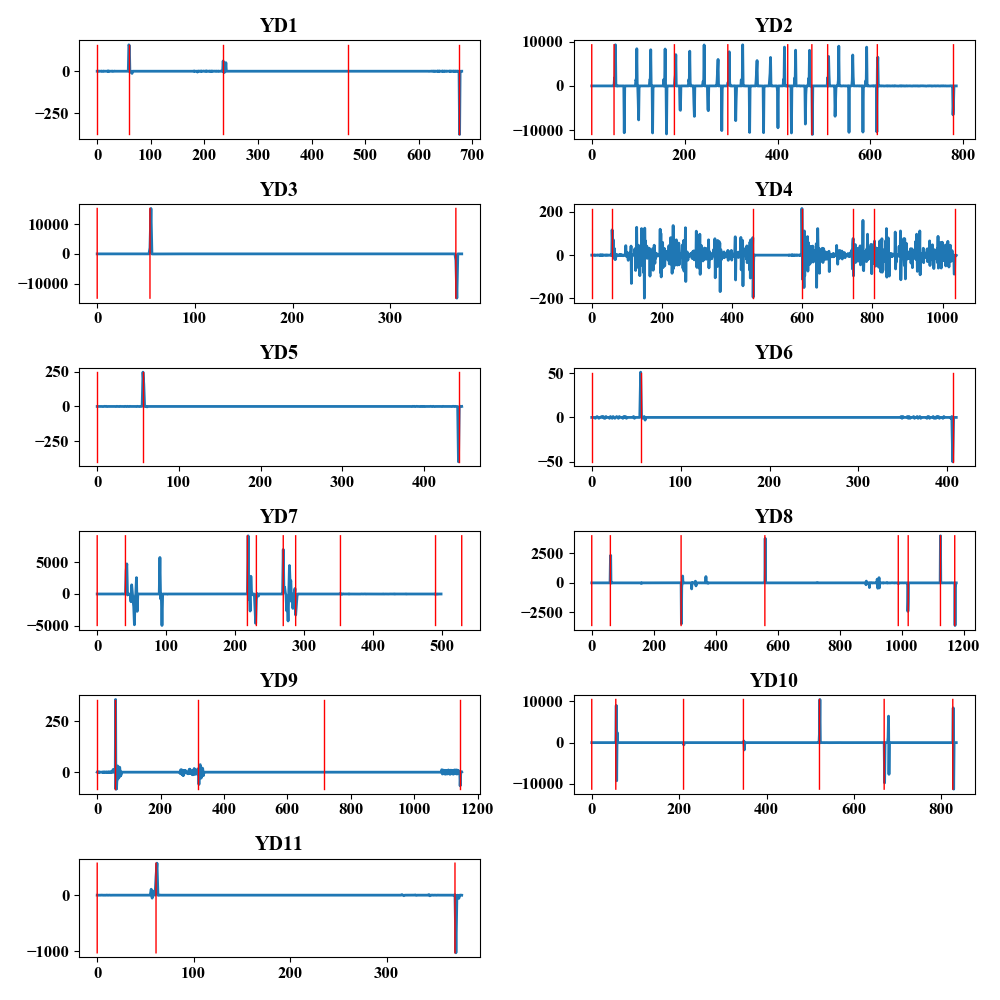

In [27]:
figure_layout(3)
fig = plt.figure(figsize=(10,10))
for i in range(0,len(equip_data)):
    ax = fig.add_subplot(6,2,(i+1))
    for ii in [2]: #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
        label = 'PC_' + str(ii) + 'pDiff'
        plt.plot(equip_data[i]['time_sec'], equip_data[i][label].values, linewidth = 2)
        yy = np.arange(equip_data[i][label].values.min(),equip_data[i][label].values.max(),1)
        for iii in range(0, len(operation_data[i]['time_sec'])):
            plt.plot(operation_data[i]['time_sec'][iii]*np.ones(len(yy)), yy, linewidth = 1,color='red')
    plt.title(instrument[i])
plt.tight_layout()
plt.show()

In [11]:
# From BG perspective:
# YD11: 25 is good enough
# YD10: 25 is good enough
# YD8: 25 is good enough
# YD3: 25 is good enough
# YD2: 50 is good enough, need roughly 50

# From signal perspective:
# YD1: 50 is barely OK, better to use 25 to 30
# YD6: 50 is barely not OK, better to use 25 to 30
# YD9: 

In [12]:
# YD2 analysis box
# equip_x_data['PC_3pDiff'].values
[area,trig_t,pulse_height_t,end_trig_t,height] = characterize_pulse(equip_data[1],'PC_1pDiff',100,-100)
cut_valid_pulse = np.abs(area) > 8000
area[cut_valid_pulse]
trig_t[cut_valid_pulse]
pulse_height_t[cut_valid_pulse][::2]
pulse_height_t[cut_valid_pulse][1::2] - pulse_height_t[cut_valid_pulse][::2]
end_trig_t[cut_valid_pulse]
height[cut_valid_pulse]
equip_data[1]
if 0:
    plt.figure()
    plt.plot(equip_data[1]['time_sec'], equip_data[1]['PC_1pDiff'].values)
    plt.show()

In [13]:
# YD3 analysis box
[area,trig_t,pulse_height_t,end_trig_t,height] = characterize_pulse(equip_data[2],'PC_1pDiff',1500,-1500)
area
trig_t
end_trig_t
pulse_height_t
height
equip_data[2]
if 0:
    plt.figure()
    plt.plot(equip_data[2]['time_sec'], equip_data[2]['PC_1pDiff'].values)
    plt.show()

In [14]:
# YD4 analysis box
[area,trig_t,pulse_height_t,end_trig_t,height] = characterize_pulse(equip_data[3],'PC_1pDiff',25,-25)
area[area > 150]
trig_t[area > 150]
area[area < -150]
area
trig_t
end_trig_t
if 0:
    plt.figure()
    plt.plot(equip_data[3]['time_sec'], equip_data[3]['PC'].values)
    plt.show()

    plt.figure()
    plt.plot(equip_data[3]['time_sec'], equip_data[3]['PC_1pDiff'].values)
    plt.show()

In [15]:
# YD5 analysis box
[area,trig_t,pulse_height_t,end_trig_t,height] = characterize_pulse(equip_data[4],'PC_1pDiff',30,-30)
area
trig_t
end_trig_t
pulse_height_t
height
equip_data[4]

,time,IC,UC,PC,QC,PFC,P,Q,PF,time_sec,...,PC_6pDiff,QC_6pDiff,PC_7pDiff,QC_7pDiff,PC_8pDiff,QC_8pDiff,PC_9pDiff,QC_9pDiff,PC_10pDiff,QC_10pDiff
0,2018-01-25 13:59:10,9,2236,3,0,181,3,0,181,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-25 13:59:11,9,2235,3,0,172,3,0,171,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-25 13:59:12,9,2235,3,0,145,3,0,145,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-25 13:59:13,9,2235,3,0,181,3,0,181,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-25 13:59:14,9,2234,3,0,151,3,0,151,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2018-01-25 13:59:15,9,2235,3,0,166,3,0,166,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2018-01-25 13:59:16,9,2235,3,0,153,3,0,153,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2018-01-25 13:59:17,9,2233,2,0,135,2,0,135,7.0,...,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0
8,2018-01-25 13:59:18,9,2234,2,0,133,2,0,133,8.0,...,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0
9,2018-01-25 13:59:19,9,2234,3,0,174,3,0,174,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# YD6 analysis box
[area,trig_t,pulse_height_t,end_trig_t,height] = characterize_pulse(equip_data[5],'PC_1pDiff',30,-30)
area
trig_t
end_trig_t
pulse_height_t
height
equip_data[5]



,time,IC,UC,PC,QC,PFC,P,Q,PF,time_sec,...,PC_6pDiff,QC_6pDiff,PC_7pDiff,QC_7pDiff,PC_8pDiff,QC_8pDiff,PC_9pDiff,QC_9pDiff,PC_10pDiff,QC_10pDiff
0,2018-01-25 14:10:03,9,2227,3,0,148,3,0,148,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-25 14:10:04,9,2227,3,0,143,3,0,143,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-25 14:10:05,9,2226,3,0,176,3,0,175,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-25 14:10:06,9,2226,3,0,150,3,0,150,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-25 14:10:07,9,2226,2,0,129,2,0,128,4.0,...,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0
5,2018-01-25 14:10:08,9,2225,2,0,136,2,0,135,5.0,...,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0
6,2018-01-25 14:10:09,9,2226,3,0,157,3,0,157,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2018-01-25 14:10:10,9,2227,3,0,160,3,0,160,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2018-01-25 14:10:11,9,2227,2,0,120,2,0,120,8.0,...,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0
9,2018-01-25 14:10:12,9,2228,2,0,125,2,0,125,9.0,...,0.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0


In [18]:
#writer = pd.ExcelWriter('output.xlsx')
#pulse_width_df.to_excel(writer,'pulse_width_df')
#pulse_height_df.to_excel(writer,'pulse_height_df')
#writer.save()

In [23]:
# temp - need to remove later
if 1:
    yd3yd7 = pd.ExcelFile("/Users/dongqinghuang/Github/NILM/A题部分数据/附件3/设备组1-YD3+YD7.xlsx")
    yd1yd2yd4 = pd.ExcelFile("/Users/dongqinghuang/Github/NILM/A题部分数据/附件3/设备组2-YD1+YD2+YD4.xlsx")
    yd4yd5yd10yd11=pd.ExcelFile("/Users/dongqinghuang/Github/NILM/A题部分数据/附件3/设备组3-YD4+YD5+YD8+YD10+YD11.xlsx")
    fj4_1=pd.ExcelFile("/Users/dongqinghuang/Github/NILM/A题部分数据/附件4/设备组1.xlsx")
    fj4_2=pd.ExcelFile("/Users/dongqinghuang/Github/NILM/A题部分数据/附件4/设备组2.xlsx")
    fj4_3=pd.ExcelFile("/Users/dongqinghuang/Github/NILM/A题部分数据/附件4/设备组3.xlsx")

    yd_mix = [yd3yd7,yd1yd2yd4,yd4yd5yd10yd11,fj4_1,fj4_2,fj4_3]
    title_list = ['设备组1-YD3+YD7','设备组2-YD1+YD2+YD4','设备组3-YD4+YD5+YD8+YD10+YD11','设备组1','设备组2','设备组3']
    equip_data_mix = []
    for i in range(1,(len(yd_mix)+1)):
        equip_data_mix.append(yd_mix[(i-1)].parse('设备数据'))
    for i in range(0, len(equip_data_mix)):
        equip_data_mix[i] = fill_missing_data(equip_data_mix[i])
        equip_data_mix[i] = add_time_s_equip_data(equip_data_mix[i])

    for ii in range(0,len(equip_data_mix)):
        for i in [1,2,3,4]: #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
            lable1 = 'PC_'+str(i)+'pDiff'
            lable2 = 'QC_'+str(i)+'pDiff'
            equip_data_mix[ii][lable1] = sweep_get_diff(equip_data_mix[ii]['PC'].values,i)
            equip_data_mix[ii][lable2] = sweep_get_diff(equip_data_mix[ii]['QC'].values,i)
        # compute mean
        '''
        for i in [2,3,4]:
            lable1 = 'PC_'+str(i)+'pMean'
            lable2 = 'QC_'+str(i)+'pMean'
            equip_data_mix[ii][lable1] = sweep_get_mean(equip_data_mix[ii]['PC'].values,i)
            equip_data_mix[ii][lable2] = sweep_get_mean(equip_data_mix[ii]['QC'].values,i)
        # compute std
        for i in [3,4,5]:
            lable1 = 'PC_'+str(i)+'pStd'
            lable2 = 'QC_'+str(i)+'pStd'
            equip_data_mix[ii][lable1] = sweep_get_std(equip_data_mix[ii]['PC'].values,i)
            equip_data_mix[ii][lable2] = sweep_get_std(equip_data_mix[ii]['QC'].values,i)
        '''



<IPython.core.display.Javascript object>


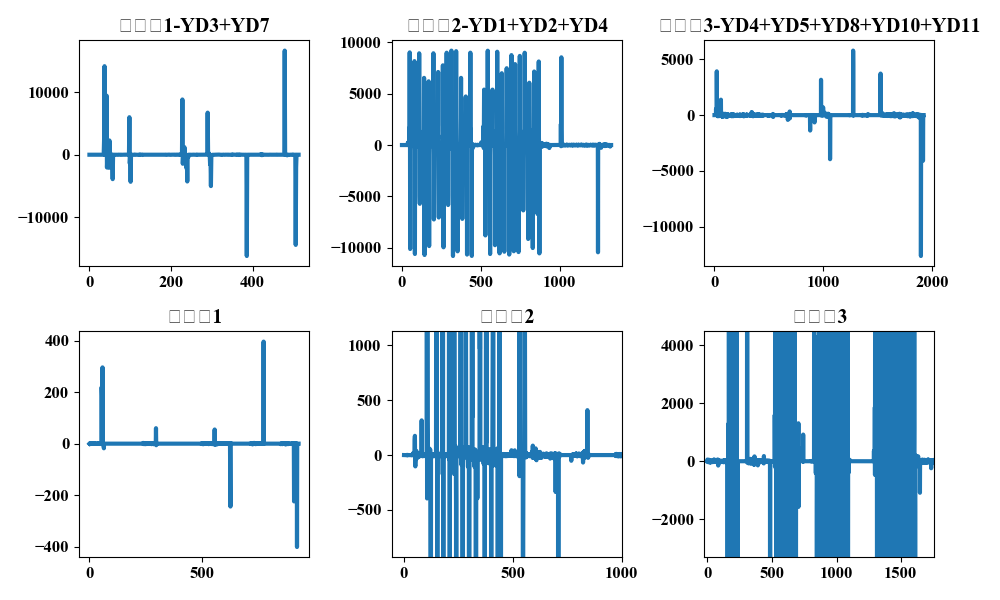

In [29]:
figure_layout(3)
fig = plt.figure(figsize=(10,6))
for i in range(0,len(equip_data_mix)):
    ax = fig.add_subplot(2,3,(i+1))
    for ii in [2]: #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
        label = 'PC_' + str(ii) + 'pDiff'
        plt.plot(equip_data_mix[i]['time_sec'], equip_data_mix[i][label].values, linewidth = 3)
        #plt.yscale('log')
    plt.title(title_list[i])
plt.tight_layout()
plt.show()